In [ ]:
import tensorflow as tf    #tensorflow use for performing deep learning algorithm
from tensorflow.keras.datasets import cifar10    #keras is tensorflows submodule and cifar10 is our image containing inbuilt dataset
from tensorflow.keras.models import Sequential  #CNN model sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense   #imported layers of CNN

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Normalize pixel values to the range [0, 1]
x_train = x_train/ 255.0
x_test = x_test/ 255.0

In [ ]:
print(x_train[:5])

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [ ]:
print(y_test[:5])

[[3]
 [8]
 [8]
 [0]
 [6]]


In [ ]:
# Printing the shapes of the loaded data
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [ ]:
y_train = y_train.ravel()

In [ ]:
y_train.shape

(50000,)

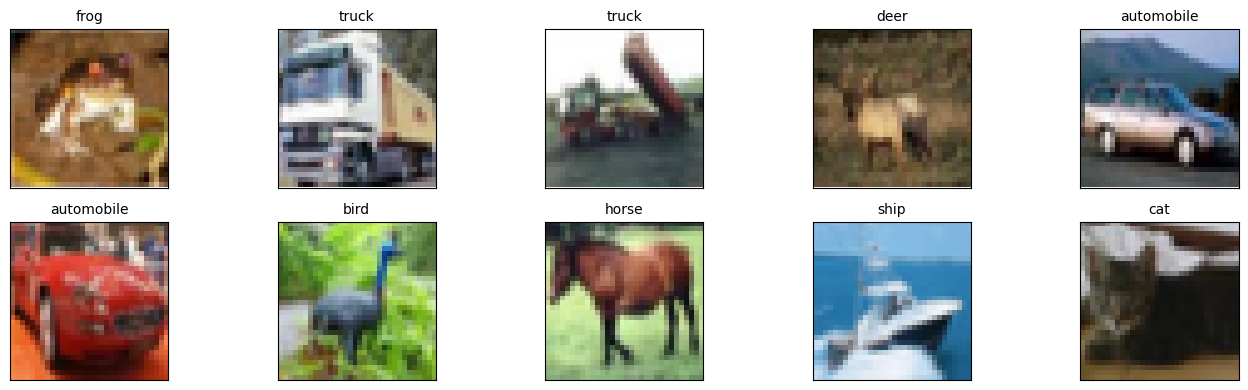

In [ ]:
import matplotlib.pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(14, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]], fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# # Build the neural network model

model=Sequential()
model.add(Conv2D((64),(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,kernel_initializer='random_uniform',activation='relu')) #first Hidden layer
model.add(Dense(128,kernel_initializer='random_uniform',activation='relu')) #second hidden layer
model.add(Dense(10,kernel_initializer='random_uniform',activation='softmax'))


In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# model.build(input_shape=(32, 32, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 128)               1843328   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
# Train the model
nn_model = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 90s 69ms/step - loss: 1.5280 - accuracy: 0.4377 - val_loss: 1.3031 - val_accuracy: 0.5381
Epoch 2/20
1250/1250 [==============================] - 73s 58ms/step - loss: 1.1741 - accuracy: 0.5784 - val_loss: 1.1404 - val_accuracy: 0.5996
Epoch 3/20
1250/1250 [==============================] - 71s 57ms/step - loss: 1.0086 - accuracy: 0.6409 - val_loss: 1.1015 - val_accuracy: 0.6201
Epoch 4/20
1250/1250 [==============================] - 72s 58ms/step - loss: 0.8835 - accuracy: 0.6869 - val_loss: 1.0689 - val_accuracy: 0.6264
Epoch 5/20
1250/1250 [==============================] - 72s 57ms/step - loss: 0.7751 - accuracy: 0.7240 - val_loss: 1.0283 - val_accuracy: 0.6492
Epoch 6/20
1250/1250 [==============================] - 73s 59ms/step - loss: 0.6758 - accuracy: 0.7576 - val_loss: 1.0894 - val_accuracy: 0.6532
Epoch 7/20
1250/1250 [==============================] - 72s 58ms/step - loss: 0.5734 - accuracy: 0.7973 - val_loss: 1.1213 -

In [ ]:
#validation accuracy
loss, accuracy = model.evaluate(x_test, y_test.ravel())
print("Validation Accuracy : {:.2f}%".format(accuracy*100))
print("Validation loss : {:.2f}%".format(loss*100))

#trainig accuracy on training dataset
loss, accuracy = model.evaluate(x_train, y_train.ravel())
print("Train Accuracy : {:.2f}%".format(accuracy*100))
print("Train loss : {:.2f}%".format(loss*100))


313/313 [==============================] - 5s 15ms/step - loss: 2.6575 - accuracy: 0.6242
Validation Accuracy : 62.42%
Validation loss : 265.75%
1563/1563 [==============================] - 20s 13ms/step - loss: 0.5791 - accuracy: 0.9110
Train Accuracy : 91.10%
Train loss : 57.91%


1/1 [==============================] - 0s 121ms/step
predicted class: horse


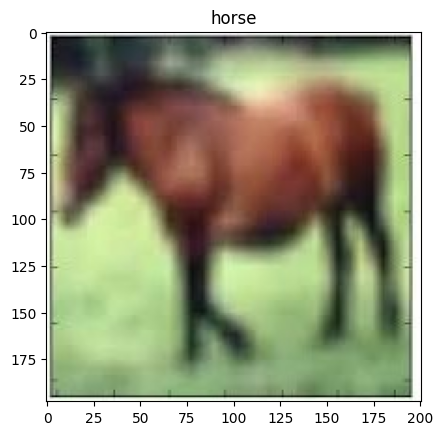

In [ ]:
#predicting the class of test image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
import numpy as np
#load the test image
test_image = load_img("/content/horse.jpeg", target_size = (32,32))
#convert the image to numpy array
test_image_array = img_to_array(test_image)
#preprocess the image (same as training data preprocessing)
test_image_array = test_image_array/255.0
#reshape the array to match the input shape of the model
test_image_array = test_image_array.reshape((1,32,32,3))
#make a prediction using the model
prediction = model.predict(test_image_array)
#print the predicted class
predicted_class_index = np.argmax(prediction)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class_name = class_names[predicted_class_index]
print("predicted class:",predicted_class_name)
#display the test image
plt.imshow(image.load_img("/content/horse.jpeg"))
plt.title(predicted_class_name)
plt.show()